#### Task2: Build a tree using Information Gain (using “tennis” dataset)
#### 2b

In [83]:
import pandas as pd
import numpy as np

In [85]:
df = pd.read_csv('tennis.csv')
df

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Hot,High,No,No
1,Sunny,Hot,High,Yes,No
2,Overcast,Hot,High,No,Yes
3,Rainy,Mild,High,No,Yes
4,Rainy,Cool,Normal,No,Yes
5,Rainy,Cool,Normal,Yes,No
6,Overcast,Cool,Normal,Yes,Yes
7,Sunny,Mild,High,No,No
8,Sunny,Cool,Normal,No,Yes
9,Rainy,Mild,Normal,No,Yes


In [87]:
# Create function to calculate entropy
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy_val

# Function to calculate the weighted entropy for a feature
def weighted_entropy(df, feature, target):
    unique_values = df[feature].unique()
    weighted_entropy_val = 0
    
    for value in unique_values:
        subset = df[df[feature] == value]
        weight = len(subset) / len(df)
        weighted_entropy_val += weight * entropy(subset[target])
        
    return weighted_entropy_val

# Function to calculate information gain
def information_gain(df, feature, target):
    total_entropy = entropy(df[target])
    weighted_entropy_attr = weighted_entropy(df, feature, target)
    info_gain = total_entropy - weighted_entropy_attr
    return info_gain

# List of attributes (features) to calculate information gain for
features = ['Outlook', 'Temperature', 'Humidity', 'Windy']

# Calculate information gain for each attribute and display the result
for f in features:
    ig = information_gain(df, f, 'Play')
    print(f'Information Gain for {f}: {ig}')


Information Gain for Outlook: 0.24674981977443933
Information Gain for Temperature: 0.02922256565895487
Information Gain for Humidity: 0.15183550136234159
Information Gain for Windy: 0.04812703040826949


#### Build a tree using sklearn 

Accuracy: 60.00%


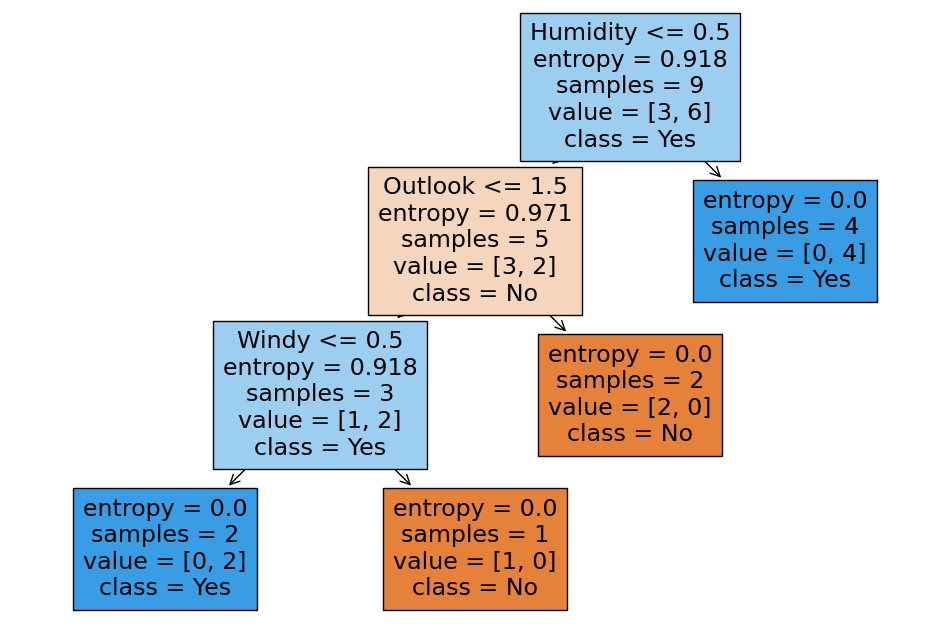

In [91]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Example DataFrame (assuming you have the data already loaded into df)
# Convert categorical feature to numeric
df['Outlook'] = df['Outlook'].astype('category').cat.codes
df['Temperature'] = df['Temperature'].astype('category').cat.codes
df['Humidity'] = df['Humidity'].astype('category').cat.codes
df['Windy'] = df['Windy'].astype('category').cat.codes

# Split features (X) and target (y)
X = df.drop('Play', axis=1)  # Features
y = df['Play']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier with a caveat: max_depth of the tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True)
plt.show()



#### 3b: (1) Write code to evaluate model performance given prediction and true labels (with AI assistant);  check the GPT result with your pen/paperwork

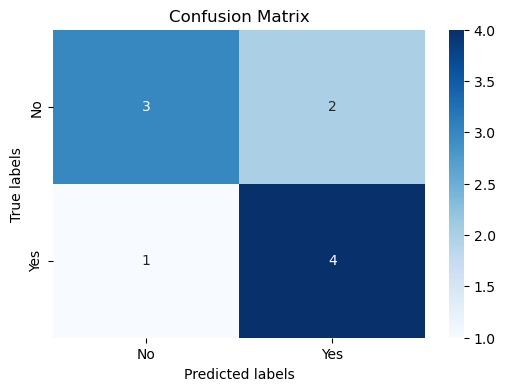

True Positives (TP): 4
False Positives (FP): 2
True Negatives (TN): 3
False Negatives (FN): 1
Accuracy: 0.7000
Precision (Positive Predictive Value): 0.6667
Recall (True Positive Rate, TPR): 0.8000
F1 Score: 0.7273
False Positive Rate (FPR): 0.4000
Specificity (True Negative Rate, TNR): 0.6000
Negative Predictive Value (NPV): 0.7500


In [112]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Provided true labels and predicted labels
true_labels = [1, 0, 1, 0, 1, 1, 0, 0, 1, 0]  # True values
predicted_labels = [1, 1, 1, 0, 1, 0, 0, 1, 1, 0]  # Predicted values

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()
# Extract True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)
TN, FP, FN, TP = conf_matrix.ravel()

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Precision (Positive Predictive Value)
precision = precision_score(true_labels, predicted_labels)

# Recall (True Positive Rate or Sensitivity)
recall = recall_score(true_labels, predicted_labels)

# F1 Score
f1 = f1_score(true_labels, predicted_labels)

# True Positive Rate (TPR) is the same as recall
tpr = recall

# False Positive Rate (FPR)
fpr = FP / (FP + TN)

# Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Negative Predictive Value (NPV)
npv = TN / (TN + FN)

# Print all metrics
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Positive Predictive Value): {precision:.4f}")
print(f"Recall (True Positive Rate, TPR): {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"Specificity (True Negative Rate, TNR): {specificity:.4f}")
print(f"Negative Predictive Value (NPV): {npv:.4f}")